In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from basico import *

In [9]:
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("basiCO version:", basico.__version__)

NumPy version: 2.2.4
Matplotlib version: 3.10.1
Seaborn version: 0.13.2
basiCO version: 0.83


Load the model defined using COPASI UI

In [70]:
load_model("model.cps")

<CDataModel "Root">

Check the species, reactions, and global parameters

In [71]:
get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
TfR,compartment,reactions,nmol/l,0.000498,1.499786e+08,1500 * 1e5 * 1e9 / ( 6.023 * 1e23 * 500 * 1e-6 ),,0.000498,1.499786e+08,-0.000031,-9.373663e+06,Metabolite_4,,1.600000e+01,TfR
Tf-TfR,compartment,reactions,nmol/l,0.000000,0.000000e+00,,,0.000000,0.000000e+00,0.000031,9.373663e+06,Metabolite_5,,0.000000e+00,Tf-TfR
Tf-TfR_int,compartment,reactions,nmol/l,0.000000,0.000000e+00,,,0.000000,0.000000e+00,0.000000,0.000000e+00,Metabolite_6,,NaN,Tf-TfR_int
Tf,compartment,reactions,nmol/l,62.500000,1.881919e+13,Values[Tf_conc].InitialValue * 1e-6 * 1e3 * 1e...,,62.500000,1.881919e+13,-0.000031,-9.373663e+06,Metabolite_7,,2.007667e+06,Tf


In [72]:
get_reactions()

,scheme,flux,particle_flux,function,key,sbml_id,display_name,mapping
name,,,,,,,,
R1,Tf + TfR = Tf-TfR,1.556533e-08,9.373663e+06,Mass action (reversible),Reaction_2,,(R1),"{'k1': 'ka', 'substrate': ['Tf', 'TfR'], 'k2':..."
R2,Tf-TfR -> Tf-TfR_int,0.000000e+00,0.000000e+00,Mass action (irreversible),Reaction_3,,(R2),"{'k1': 'kint', 'substrate': 'Tf-TfR'}"


In [73]:
get_parameters()

,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id,display_name
name,,,,,,,,,,
ka,fixed,(nmol/l)^-1*min^-1,0.001,,,0.001,0.0,ModelValue_5,,Values[ka]
KD,fixed,nmol/l,25.000,,,25.000,0.0,ModelValue_6,,Values[KD]
kint,fixed,min^-1,0.500,,,0.500,0.0,ModelValue_7,,Values[kint]
Tf_conc,fixed,ug/ml,5.000,,,5.000,0.0,ModelValue_8,,Values[Tf_conc]
kd,fixed,min^-1,0.025,Values[KD].InitialValue * Values[ka].InitialValue,,0.025,0.0,ModelValue_9,,Values[kd]


Parameter scan

In [6]:
set_scan_items([{'item': 'Values[ka].InitialValue', 'values': [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.025]}])

data1 = run_scan(output = ['Time', 'Values[ka].InitialValue', 'Values[KD].InitialValue', 
                          'Values[kint].InitialValue', 'Values[Tf_conc].InitialValue',
                          '[Tf]', '[TfR]', '[Tf-TfR]', '[Tf-TfR_int]'])

# k_int = 0.5 min, K_D = 25 nM, Tf_conc = 5 ug/ml

# change column names
data1.columns = ['time', 'k_a', 'K_D', 'k_int', 'Tf_conc', 'Tf', 'TfR', 'Tf-TfR', 'Tf-TfR_int']

# change TfR to TfR/(TfR + Tf-TfR + Tf-TfR_int), similarly for Tf-TfR and Tf-TfR_int columns
data1['TfR_relative'] = data1['TfR']/(data1['TfR'] + data1['Tf-TfR'] + data1['Tf-TfR_int'])
data1['Tf-TfR_relative'] = data1['Tf-TfR']/(data1['TfR'] + data1['Tf-TfR'] + data1['Tf-TfR_int'])
data1['Tf-TfR_int_relative'] = data1['Tf-TfR_int']/(data1['TfR'] + data1['Tf-TfR'] + data1['Tf-TfR_int'])

In [7]:
set_scan_items([{'item': 'Values[ka].InitialValue', 'values': np.linspace(0.001, 0.01, 100).tolist()},
                {'item': 'Values[KD].InitialValue', 'values': [1, 5, 10, 25, 50]},
                {'item': 'Values[kint].InitialValue', 'values': [0.2, 0.3, 0.4, 0.5, 0.8]},
                {'item': 'Values[Tf_conc].InitialValue', 'values': [1, 3, 5, 8, 10]}])

data2 = run_scan(output = ['Time', 'Values[ka].InitialValue', 'Values[KD].InitialValue', 
                          'Values[kint].InitialValue', 'Values[Tf_conc].InitialValue',
                          '[Tf]', '[TfR]', '[Tf-TfR]', '[Tf-TfR_int]'])

# change column names
data2.columns = ['time', 'k_a', 'K_D', 'k_int', 'Tf_conc', 'Tf', 'TfR', 'Tf-TfR', 'Tf-TfR_int']

# change TfR to TfR/(TfR + Tf-TfR + Tf-TfR_int), similarly for Tf-TfR and Tf-TfR_int columns
data2['TfR_relative'] = data2['TfR']/(data2['TfR'] + data2['Tf-TfR'] + data2['Tf-TfR_int'])
data2['Tf-TfR_relative'] = data2['Tf-TfR']/(data2['TfR'] + data2['Tf-TfR'] + data2['Tf-TfR_int'])
data2['Tf-TfR_int_relative'] = data2['Tf-TfR_int']/(data2['TfR'] + data2['Tf-TfR'] + data2['Tf-TfR_int'])

Figure 5 (b) and (c)

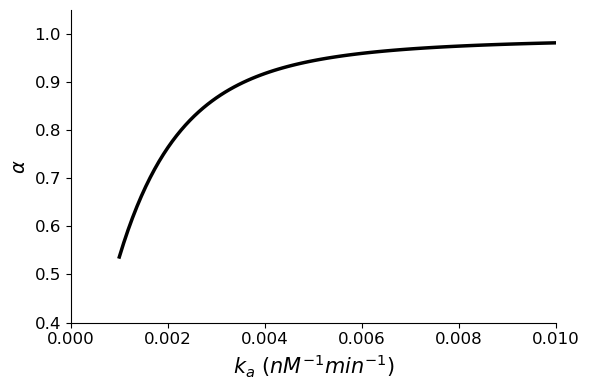

In [65]:
data_temp = data2[(data2['k_int'] == 0.5) & (data2['K_D'] == 25) & (data2['Tf_conc'] == 5) & (data2['time'] == 15)]

# plot k_a vs Tf-TfR_int_relative in data_temp using seaborn
plt.figure(figsize=(6, 4))
sns.lineplot(data=data_temp, x='k_a', y='Tf-TfR_int_relative', linewidth=2.5)
plt.xlabel('$k_a$ ($nM^{-1}min^{-1}$)', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=14)

# set x and y limits
plt.xlim(0, 0.01)
plt.ylim(0.4, 1.05)

# change line color to black
for line in plt.gca().lines:
    line.set_color('black')
    line.set_linewidth(2.5)

# remove top and right plot boundaries
sns.despine()

# set font size to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# save the figure
plt.savefig('figure5b.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_378755/1657101162.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(title='$[Tf]_0$ ($\mu$g/ml)', title_fontsize='14', fontsize='12', frameon=False, ncol=3)


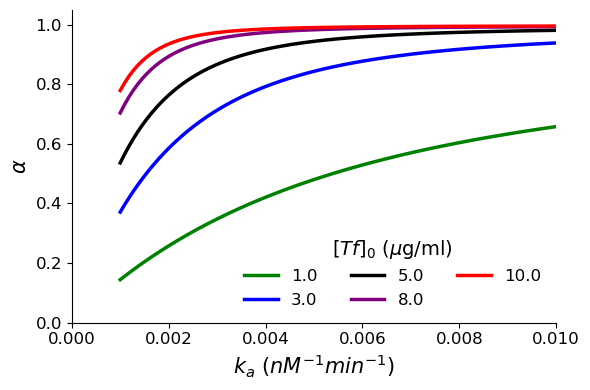

In [66]:
data_temp = data2[(data2['k_int'] == 0.5) & (data2['K_D'] == 25) & (data2['time'] == 15)]

# plot k_a vs Tf-TfR_int_relative in data_temp using seaborn
plt.figure(figsize=(6, 4))
# Define a custom palette
custom_palette = ['green', 'blue', 'black', 'purple', 'red']
sns.lineplot(data=data_temp, x='k_a', y='Tf-TfR_int_relative', hue = 'Tf_conc', palette = custom_palette, linewidth=2.5)
plt.xlabel('$k_a$ ($nM^{-1}min^{-1}$)', fontsize=15)
# latex formatting for y-axis label Internalized Tf-TfR/Total TfR
plt.ylabel(r'$\alpha$', fontsize=15)
# remove box around the legend and change legend title
plt.legend(title='$[Tf]_0$ ($\mu$g/ml)', title_fontsize='14', fontsize='12', frameon=False, ncol=3)

# set x and y limits
plt.xlim(0, 0.01)
plt.ylim(0, 1.05)

# remove top and right plot boundaries
sns.despine()

# set font size to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# save the figure
plt.savefig('figure5c.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Supplementary Figure S6

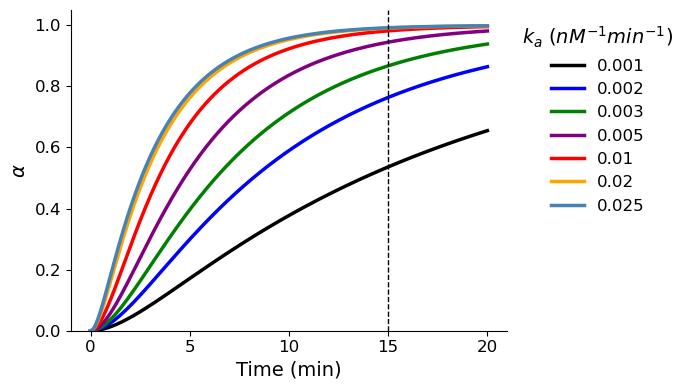

In [67]:
# plot k_a vs Tf-TfR_int_relative in data_temp using seaborn
plt.figure(figsize=(7, 4))
# Define a custom palette
custom_palette = ['black', 'blue', 'green', 'purple', 'red', 'orange', '#4682B4']
sns.lineplot(data=data1, x='time', y='Tf-TfR_int_relative', hue = 'k_a', palette = custom_palette, linewidth=2.5)
plt.xlabel('Time (min)', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
# remove box around the legend, change legend title, and place legend outside the plot
plt.legend(title='$k_a$ ($nM^{-1}min^{-1}$)', title_fontsize='14', fontsize='12', 
           frameon=False, loc = 'upper left', bbox_to_anchor=(1, 1))
# add vertical line at x=15 dashed
plt.axvline(x=15, linestyle='--', color = 'k', linewidth=1)

# set x and y limits
plt.ylim(0, 1.05)

# set xticks
plt.xticks(np.arange(0, 21, 5), fontsize=12)

# remove top and right plot boundaries
sns.despine()

# set font size to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# save the figure
plt.savefig('supplementary_figure6a.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

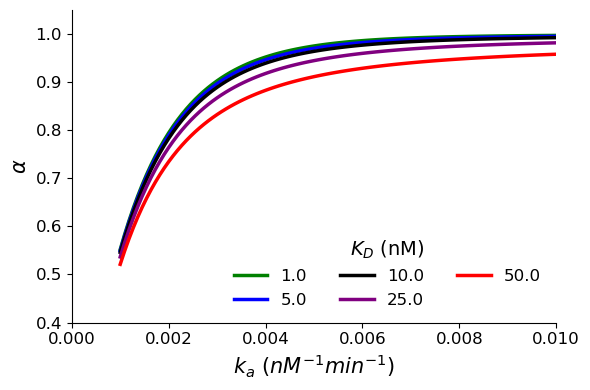

In [68]:
data_temp = data2[(data2['k_int'] == 0.5) & (data2['Tf_conc'] == 5) & (data2['time'] == 15)]

# plot k_a vs Tf-TfR_int_relative in data_temp using seaborn
plt.figure(figsize=(6, 4))
# Define a custom palette
custom_palette = ['green', 'blue', 'black', 'purple', 'red']
sns.lineplot(data=data_temp, x='k_a', y='Tf-TfR_int_relative', hue = 'K_D', palette = custom_palette, linewidth=2.5)
plt.xlabel('$k_a$ ($nM^{-1}min^{-1}$)', fontsize=15)
# latex formatting for y-axis label Internalized Tf-TfR/Total TfR
plt.ylabel(r'$\alpha$', fontsize=15)
# remove box around the legend and change legend title
plt.legend(title='$K_D$ (nM)', title_fontsize='14', fontsize='12', frameon=False, ncol=3)

# set x and y limits
plt.xlim(0, 0.01)
plt.ylim(0.4, 1.05)

# remove top and right plot boundaries
sns.despine()

# set font size to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# save the figure
plt.savefig('supplementary_figure6b.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

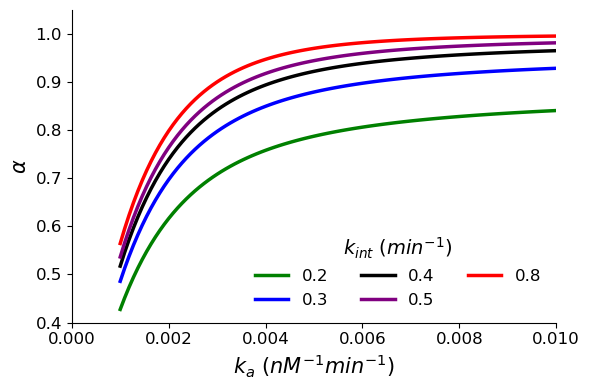

In [69]:
data_temp = data2[(data2['K_D'] == 25) & (data2['Tf_conc'] == 5) & (data2['time'] == 15)]

# plot k_a vs Tf-TfR_int_relative in data_temp using seaborn
plt.figure(figsize=(6, 4))
# Define a custom palette
custom_palette = ['green', 'blue', 'black', 'purple', 'red']
sns.lineplot(data=data_temp, x='k_a', y='Tf-TfR_int_relative', hue = 'k_int', palette = custom_palette, linewidth=2.5)
plt.xlabel('$k_a$ ($nM^{-1}min^{-1}$)', fontsize=15)
# latex formatting for y-axis label Internalized Tf-TfR/Total TfR
plt.ylabel(r'$\alpha$', fontsize=15)
# remove box around the legend and change legend title
plt.legend(title='$k_{int}$ ($min^{-1}$)', title_fontsize='14', fontsize='12', frameon=False, ncol=3)

# set x and y limits
plt.xlim(0, 0.01)
plt.ylim(0.4, 1.05)

# remove top and right plot boundaries
sns.despine()

# set font size to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# save the figure
plt.savefig('supplementary_figure6c.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()